In [ ]:
import numpy as np

file_path = '/content/drive/MyDrive/mnist.npz'
file = np.load(file_path)

x_train, y_train = file['x_train'], file['y_train']
x_test, y_test = file['x_test'], file['y_test']
file.close()


In [ ]:

x_train_reshaped = x_train.reshape(x_train.shape[0], -1)

num_classes = len(np.unique(y_train))

samples_per_class = 100
X = []
for class_label in range(num_classes):
    class_indices = np.where(y_train == class_label)[0]
    X.extend(np.random.choice(class_indices, samples_per_class, replace=False))

selected_samples = x_train_reshaped[X]

X = selected_samples.T

X.shape

(784, 1000)

In [ ]:
mu=np.mean(X)
mean_per_pixel = np.mean(X, axis=0, keepdims=True)

X_mean_removed = X - mean_per_pixel

In [ ]:
S = np.dot(X_mean_removed, X_mean_removed.T) / 999
eigenvalues, eigenvectors = np.linalg.eigh(S)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
U = sorted_eigenvectors
# print(U)

[[-2.76579436e-02  8.24713320e-03  2.41245666e-03 ...  0.00000000e+00
   0.00000000e+00 -1.08240058e-04]
 [-2.76579436e-02  8.24713320e-03  2.41245666e-03 ...  1.67449807e-01
   1.79953397e-02 -1.62203058e-01]
 [-2.76579436e-02  8.24713320e-03  2.41245666e-03 ...  3.85145497e-01
   9.71925174e-02  1.65407610e-01]
 ...
 [-2.76579436e-02  8.24713320e-03  2.41245666e-03 ... -4.66953754e-03
   6.06987325e-03 -1.61248576e-01]
 [-2.76579436e-02  8.24713320e-03  2.41245666e-03 ... -1.44082189e-05
  -2.06815011e-02 -1.76181853e-01]
 [-2.76579436e-02  8.24713320e-03  2.41245666e-03 ... -2.12336727e-03
  -1.64364671e-02 -1.77116898e-01]]


In [ ]:
cor_mat1 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 2.44574420e-02+0.j  4.31986914e-02+0.j  5.56174960e-02+0.j ...
   1.61739643e-02+0.j -1.44042401e-03+0.j  2.46801027e-02+0.j]
 [ 4.41302524e-02+0.j  2.99803637e-02+0.j  9.92794473e-03+0.j ...
  -1.04505545e-02+0.j -8.04718335e-04+0.j -3.17905715e-03+0.j]
 [ 3.15436587e-02+0.j  4.56728536e-02+0.j  5.30110098e-02+0.j ...
  -1.10758988e-02+0.j  1.33885338e-02+0.j -6.00045990e-03+0.j]
 ...
 [ 2.91717040e-02+0.j  2.18661902e-02+0.j -1.76273800e-02+0.j ...
   2.97190345e-13+0.j  8.57462990e-13+0.j  1.94148196e-12+0.j]
 [ 2.74562501e-02+0.j  4.65168378e-02+0.j -2.44133187e-02+0.j ...
  -2.46834109e-02+0.j  1.18383418e-02+0.j  4.45818568e-03+0.j]
 [ 3.79209285e-02+0.j -9.77912998e-04+0.j -4.37314068e-02+0.j ...
  -6.66273875e-03+0.j  5.33381757e-03+0.j -3.26101030e-02+0.j]]

Eigenvalues 
[ 3.11623660e+02+0.00000000e+00j  6.16425948e+01+0.00000000e+00j
  5.13487375e+01+0.00000000e+00j  4.23715458e+01+0.00000000e+00j
  3.48868539e+01+0.00000000e+00j  3.22719869e+01+0.00000000e+0

In [ ]:
Y = np.dot(U.T, X_mean_removed)
X_recon = np.dot(U, Y)
mse = np.mean((X_mean_removed - X_recon) ** 2)
print("MSE:", mse)

MSE: 1.968791988042542e-26


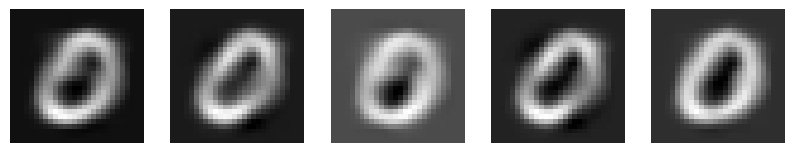

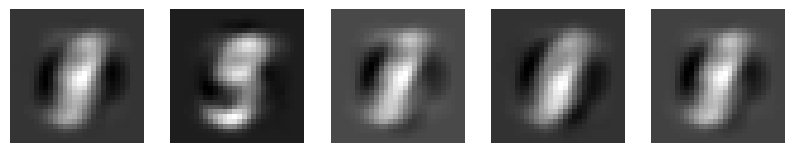

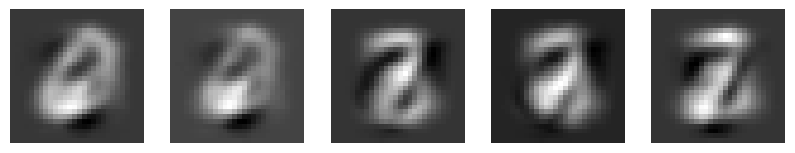

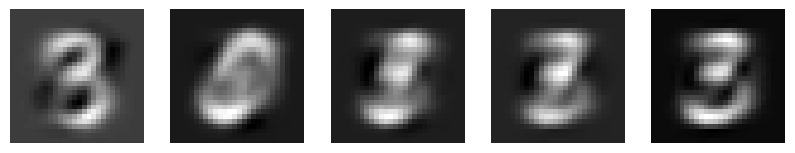

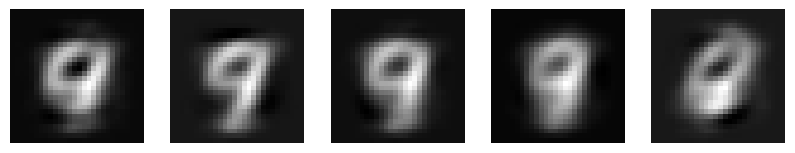

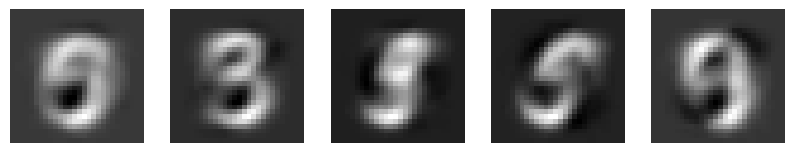

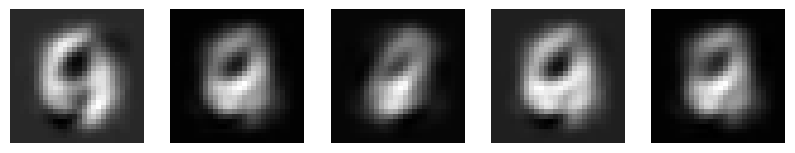

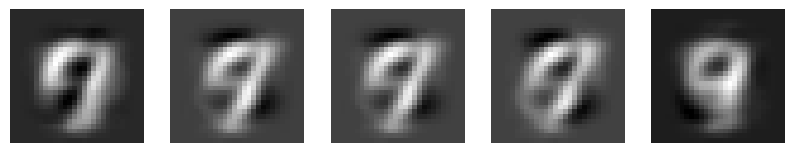

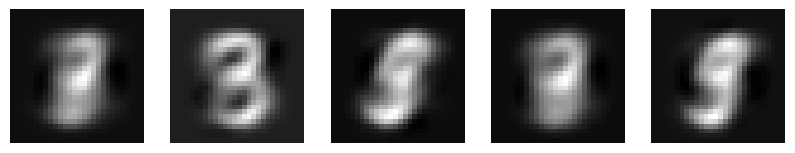

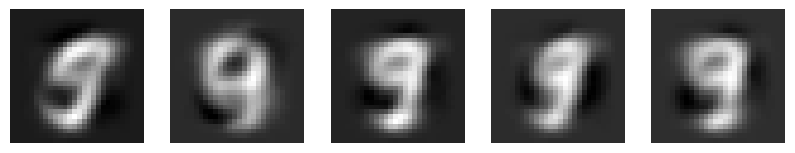

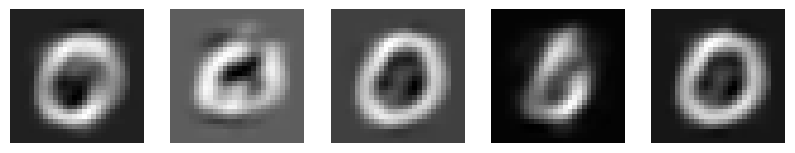

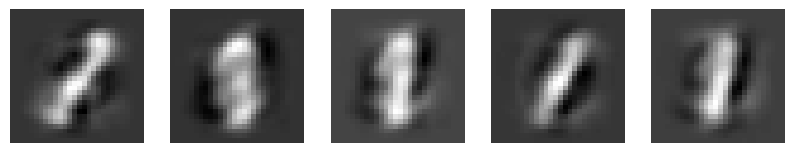

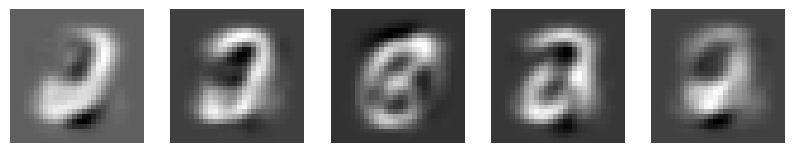

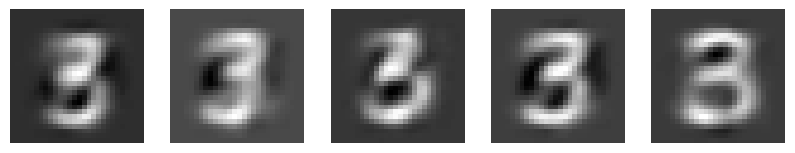

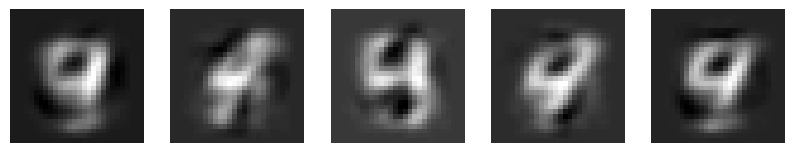

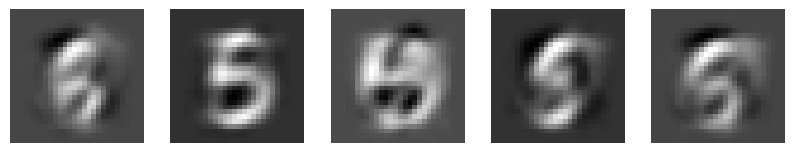

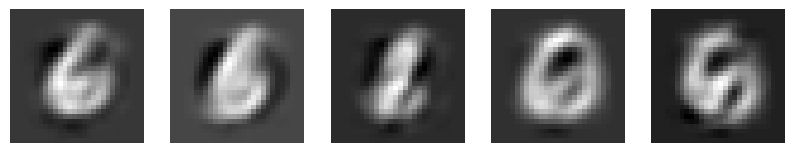

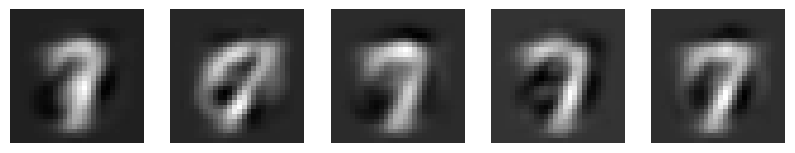

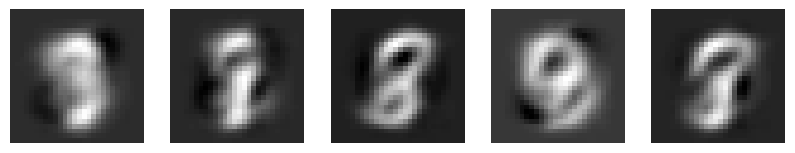

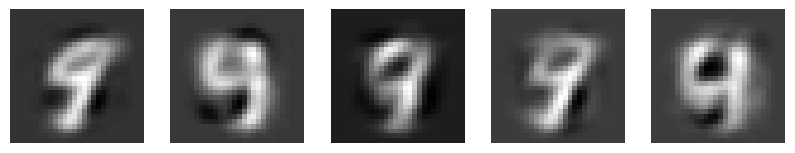

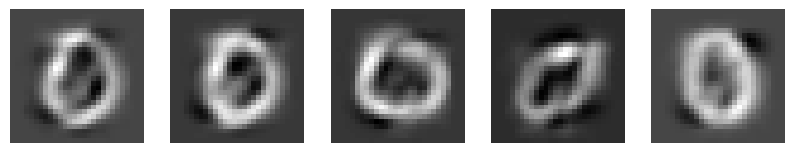

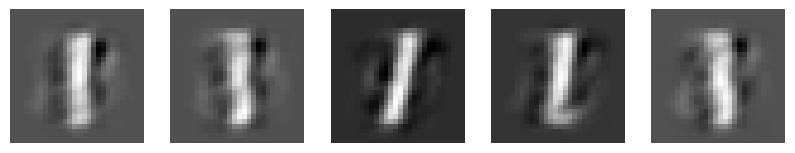

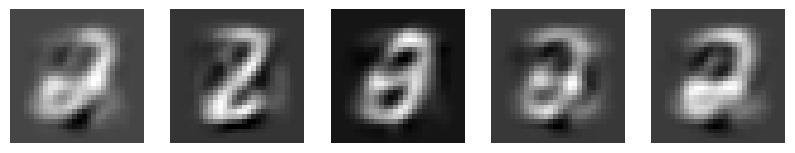

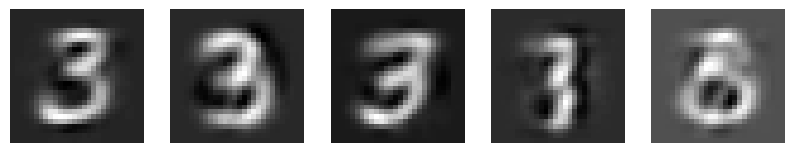

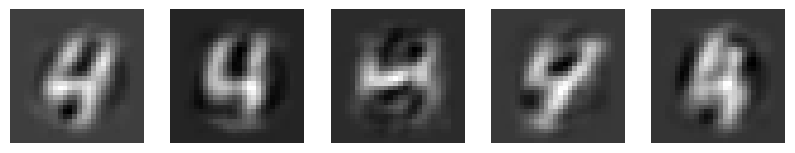

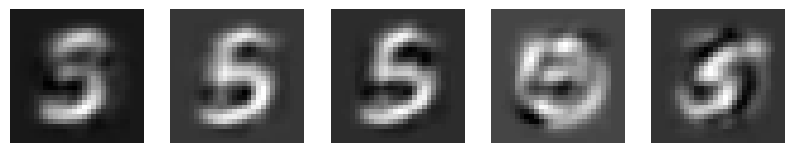

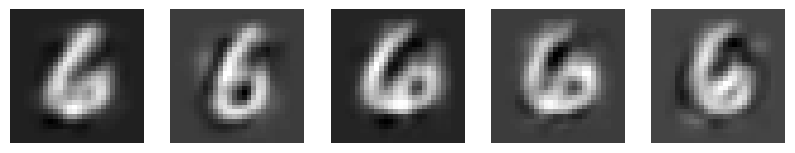

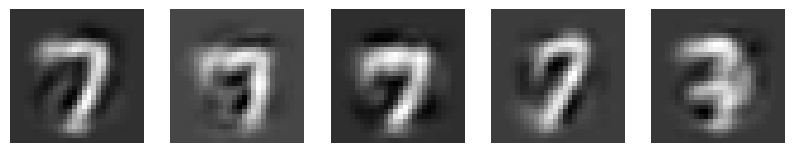

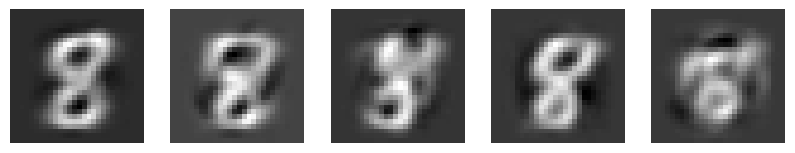

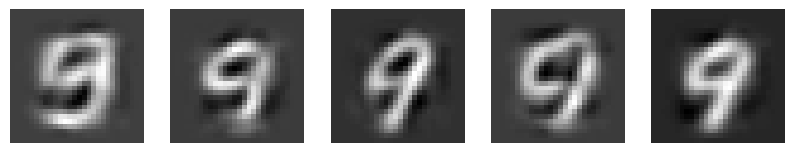

In [ ]:
import matplotlib.pyplot as plt

def plot_img(p, U, X_central, meanvals, num_images=5):
    Up = U[:, :p]
    UpY = np.dot(Up.T, X_central)
    Upy = np.dot(Up, UpY)
    Upy_added_mean = Upy + meanvals

    plt.figure(figsize=(num_images*2, 2))

    for i in range(num_images):
        img = np.real(Upy_added_mean[:, i].reshape(28, 28))
        plt.subplot(1, num_images, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()

for p in [5, 10, 20]:
    for class_label in range(num_classes):
        class_indices = np.where(y_train == class_label)[0]
        selected_indices = np.random.choice(class_indices, 5, replace=False)
        X_class = x_train_reshaped[selected_indices].T
        X_central_class = X_class - np.mean(X_class, axis=0)
        mean_per_pixel_class = np.mean(X_class, axis=0)

        plot_img(p, U, X_central_class, mean_per_pixel_class)


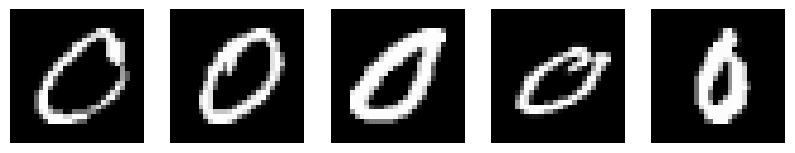

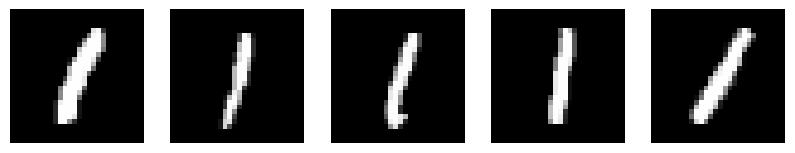

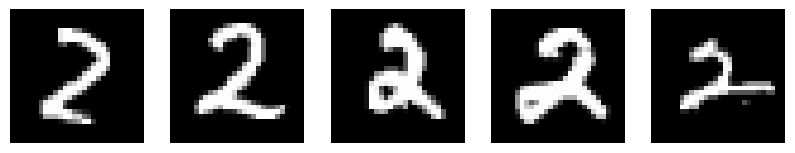

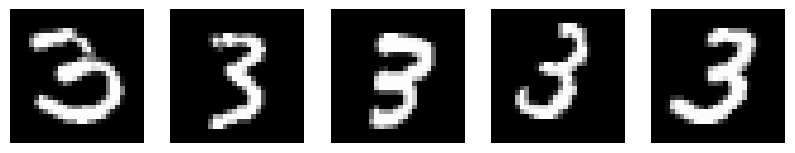

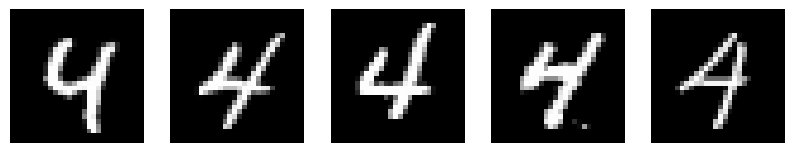

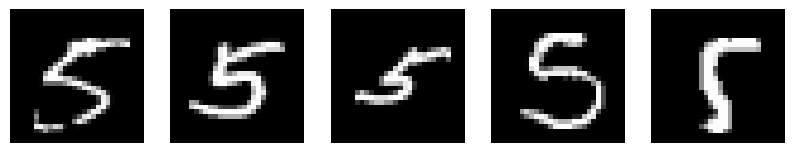

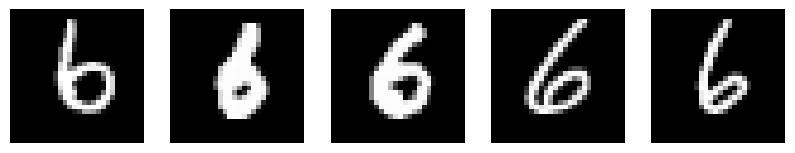

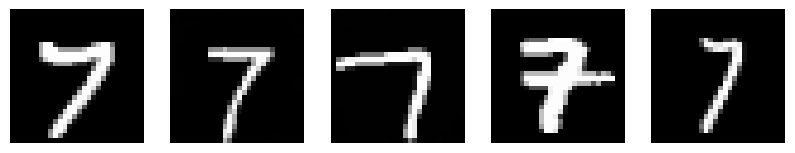

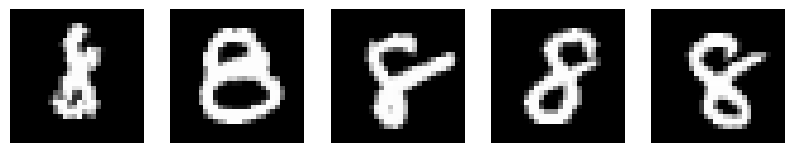

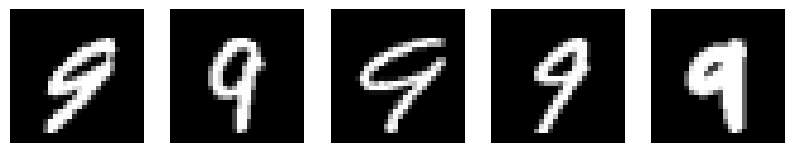

In [ ]:
for p in [783]:
    for class_label in range(num_classes):
        class_indices = np.where(y_train == class_label)[0]
        selected_indices = np.random.choice(class_indices, 5, replace=False)
        X_class = x_train_reshaped[selected_indices].T
        X_central_class = X_class - np.mean(X_class, axis=0)
        mean_per_pixel_class = np.mean(X_class, axis=0)

        plot_img(p, U, X_central_class, mean_per_pixel_class)

In [ ]:
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)
def qda(x, mu_total, sigma_total, priors):
    num_classes = len(mu_total)
    class_scores = []
    for i in range(num_classes):
        mu = mu_total[i]
        covariance = sigma_total[i]

        det = np.linalg.det(covariance)

        if det == 0:
            det = 1e-6

        inverse_covariance_matrix = np.linalg.pinv(covariance)

        centered_x = x - mu
        exponent = -0.5 * np.sum(centered_x.dot(inverse_covariance_matrix) * centered_x, axis=1)

        class_scores.append(exponent + 0.5 * np.log(det) + np.log(priors[i]))

    return np.argmax(class_scores, axis=0)

In [ ]:
class QuadraticDiscriminantAnalysis:
    def __init__(self):
        self.class_priors_ = None
        self.class_means_ = None
        self.class_covariance_matrices_ = None

    def fit(self, X, y):
        classes = np.unique(y)
        num_classes = len(classes)

        self.class_priors_ = np.zeros(num_classes)
        self.class_means_ = []
        self.class_covariance_matrices_ = []

        for i, class_label in enumerate(classes):
            X_class = X[y == class_label]
            class_prior = len(X_class) / len(X)
            class_mean = np.mean(X_class, axis=0)
            class_covariance_matrix = np.cov(X_class, rowvar=False)

            self.class_priors_[i] = class_prior
            self.class_means_.append(class_mean)
            self.class_covariance_matrices_.append(class_covariance_matrix)

    def _quadratic_discriminant_function(self, x, class_index):
        class_mean = self.class_means_[class_index]
        class_covariance_matrix = self.class_covariance_matrices_[class_index]
        det_covariance = np.linalg.det(class_covariance_matrix)
        if det_covariance == 0:
            det_covariance = 1e-6

        inv_covariance_matrix = np.linalg.inv(class_covariance_matrix)
        centered_x = x - class_mean
        exponent = -0.5 * np.sum(centered_x.dot(inv_covariance_matrix) * centered_x)
        log_det_covariance = np.log(det_covariance)

        return exponent + 0.5 * log_det_covariance

    def predict(self, X):
        num_samples = len(X)
        num_classes = len(self.class_priors_)
        predicted_labels = np.zeros(num_samples, dtype=int)

        for i in range(num_samples):
            max_score = float('-inf')
            predicted_label = -1
            for j in range(num_classes):
                class_score = self._quadratic_discriminant_function(X[i], j)
                if class_score > max_score:
                    max_score = class_score
                    predicted_label = j
            predicted_labels[i] = predicted_label

        return predicted_labels

def c_mu_sigma(data, labels):
    mu = []
    sigma = []

    for class_label in range(10):
        class_samples = data[labels == class_label]

        add_mean = np.mean(class_samples, axis=0)
        mu.append(add_mean)

        add_cov = np.cov(class_samples, rowvar=False)
        sigma.append(add_cov)

    mu = np.array(mu)
    sigma = np.array(sigma)
    return mu, sigma

X_1, X_2 = c_mu_sigma(x_train_flat, y_train)

def qda(x, y, mu_total, sigma_total, priors):
    qda_classifier = QuadraticDiscriminantAnalysis()
    qda_classifier.fit(x, y)
    return qda_classifier.predict(x)

num_samples = len(y_test)
unique_labels, label_counts = np.unique(y_train, return_counts=True)
priors = label_counts / num_samples

def per_class_accuracy(true_labels, predicted_labels, class_label):
    class_indices = (true_labels == class_label)
    class_correct = predicted_labels[class_indices] == true_labels[class_indices]
    return np.mean(class_correct)

accuracy_results = []

for p in [5, 10, 20]:
    U_p = U[:, :p]
    Y_p = np.dot(U_p.T, x_test_flat.T)

    predicted_labels_test = qda(Y_p.T, y_test, X_1, X_2, priors)

    overall_accuracy_test = np.mean(predicted_labels_test == y_test) * 100
    print(f"Overall Accuracy for p={p}: {overall_accuracy_test:.2f}%")

    per_class_accuracies = []
    for class_label in range(10):
        class_accuracy = per_class_accuracy(y_test, predicted_labels_test, class_label) * 100
        per_class_accuracies.append(class_accuracy)
        print(f"Class {class_label} Accuracy for p={p}: {class_accuracy:.2f}%")

    accuracy_results.append((overall_accuracy_test, per_class_accuracies))




Overall Accuracy for p=5: 61.52%
Class 0 Accuracy for p=5: 92.96%
Class 1 Accuracy for p=5: 10.04%
Class 2 Accuracy for p=5: 83.04%
Class 3 Accuracy for p=5: 67.72%
Class 4 Accuracy for p=5: 47.45%
Class 5 Accuracy for p=5: 80.83%
Class 6 Accuracy for p=5: 48.02%
Class 7 Accuracy for p=5: 49.03%
Class 8 Accuracy for p=5: 70.02%
Class 9 Accuracy for p=5: 74.63%
Overall Accuracy for p=10: 78.66%
Class 0 Accuracy for p=10: 95.10%
Class 1 Accuracy for p=10: 7.49%
Class 2 Accuracy for p=10: 95.54%
Class 3 Accuracy for p=10: 88.91%
Class 4 Accuracy for p=10: 82.59%
Class 5 Accuracy for p=10: 89.13%
Class 6 Accuracy for p=10: 89.14%
Class 7 Accuracy for p=10: 77.92%
Class 8 Accuracy for p=10: 85.93%
Class 9 Accuracy for p=10: 85.93%
Overall Accuracy for p=20: 82.03%
Class 0 Accuracy for p=20: 97.96%
Class 1 Accuracy for p=20: 0.00%
Class 2 Accuracy for p=20: 98.84%
Class 3 Accuracy for p=20: 94.85%
Class 4 Accuracy for p=20: 92.46%
Class 5 Accuracy for p=20: 95.40%
Class 6 Accuracy for p=20: 